# Project-2 Credit Lending and Eligibility

Topic: loan defaulters in the banking domain.

Due to their weak or non-existent credit history, lending providers find it difficult to issue loans to clients. As a result, some consumers take advantage of the situation by becoming defaulters.

Hypothesis:
1) If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company- True

2) If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company- True

3) males taking more loans than females- NO


Data Link: https://www.kaggle.com/amritachatterjee09/eda-bank-loan-default-risk-analysis/data


Size of Data:
166MB and 122 columns, 307512 rows in table

In [1]:
# Importing necessary libararies and warning handlers
import warnings

warnings.filterwarnings('ignore')

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
%matplotlib inline

In [2]:
#Ensuring the columns and rows do not get hidden when attempting to display
pd.set_option('display.max_rows', None, 'display.max_columns',None)

In [3]:
train_data = pd.read_csv('application_data.csv')
train_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

## 1.Variable Identification

In [4]:
train_data.shape #inspecting the number of rows and columns

(307511, 122)

In [5]:
train_data.info() #inspecting the summary of the Train_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [6]:
train_data.describe() #Taking a look at some basic statistical details like percentile, mean, std etc.

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

## 2. Missing values treatment

### 2.1 Inspecting Null values in each column by percentage 

In [7]:
round(train_data.isnull().sum()/len(train_data),2)

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.00
NAME_TYPE_SUITE                 0.00
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
OWN_CAR_AGE                     0.66
FLAG_MOBIL                      0.00
FLAG_EMP_PHONE                  0.00
FLAG_WORK_PHONE                 0.00
FLAG_CONT_MOBILE                0.00
FLAG_PHONE                      0.00
F

### 2.2 Checking colums with higest percentage of null values

In [8]:
mostNulls = train_data.isnull().sum()/len(train_data)
mostNulls = mostNulls[mostNulls>=0.4]
mostNulls.index

Index(['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAREA_MEDI', 'FO

### 2.3 Purging the columns with largest percent of missing values from original Dataframe

In [9]:
train_data.drop(labels = mostNulls.index, axis =1, inplace = True)

In [10]:
#Inspecting the Dataframe post dropping the columns
round(train_data.isnull().sum()/len(train_data),2)

SK_ID_CURR                     0.00
TARGET                         0.00
NAME_CONTRACT_TYPE             0.00
CODE_GENDER                    0.00
FLAG_OWN_CAR                   0.00
FLAG_OWN_REALTY                0.00
CNT_CHILDREN                   0.00
AMT_INCOME_TOTAL               0.00
AMT_CREDIT                     0.00
AMT_ANNUITY                    0.00
AMT_GOODS_PRICE                0.00
NAME_TYPE_SUITE                0.00
NAME_INCOME_TYPE               0.00
NAME_EDUCATION_TYPE            0.00
NAME_FAMILY_STATUS             0.00
NAME_HOUSING_TYPE              0.00
REGION_POPULATION_RELATIVE     0.00
DAYS_BIRTH                     0.00
DAYS_EMPLOYED                  0.00
DAYS_REGISTRATION              0.00
DAYS_ID_PUBLISH                0.00
FLAG_MOBIL                     0.00
FLAG_EMP_PHONE                 0.00
FLAG_WORK_PHONE                0.00
FLAG_CONT_MOBILE               0.00
FLAG_PHONE                     0.00
FLAG_EMAIL                     0.00
OCCUPATION_TYPE             

## 3. Missing values treatment

### 3.1 Imputing the columns with 14% of null values 

In [11]:
train_data['AMT_REQ_CREDIT_BUREAU_HOUR'].value_counts(normalize = True)

0.0    0.993887
1.0    0.005865
2.0    0.000211
3.0    0.000034
4.0    0.000004
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

In [12]:
train_data['AMT_REQ_CREDIT_BUREAU_DAY'].value_counts(normalize = True)

0.0    0.994402
1.0    0.004857
2.0    0.000399
3.0    0.000169
4.0    0.000098
5.0    0.000034
6.0    0.000030
9.0    0.000008
8.0    0.000004
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

In [13]:
train_data['AMT_REQ_CREDIT_BUREAU_WEEK'].value_counts(normalize = True)

0.0    0.967909
1.0    0.030858
2.0    0.000748
3.0    0.000218
4.0    0.000128
6.0    0.000075
5.0    0.000038
8.0    0.000019
7.0    0.000008
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

In [14]:
train_data['AMT_REQ_CREDIT_BUREAU_MON'].value_counts(normalize = True)

0.0     0.835488
1.0     0.124617
2.0     0.020249
3.0     0.007485
4.0     0.004045
5.0     0.002263
6.0     0.001290
7.0     0.001120
9.0     0.000774
8.0     0.000696
10.0    0.000496
11.0    0.000447
12.0    0.000289
13.0    0.000271
14.0    0.000150
15.0    0.000132
16.0    0.000086
17.0    0.000053
18.0    0.000023
19.0    0.000011
24.0    0.000004
27.0    0.000004
22.0    0.000004
23.0    0.000004
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

In [15]:
train_data['AMT_REQ_CREDIT_BUREAU_QRT'].value_counts(normalize = True)

0.0      0.809863
1.0      0.127305
2.0      0.054182
3.0      0.006455
4.0      0.001790
5.0      0.000241
6.0      0.000105
7.0      0.000026
8.0      0.000026
19.0     0.000004
261.0    0.000004
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

## 4. Variable Conversion

In [52]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  float64 
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   FLAG_OWN_CAR                 307511 non-null  object  
 5   FLAG_OWN_REALTY              307511 non-null  object  
 6   CNT_CHILDREN                 307511 non-null  float64 
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              306219 non-null  object  
 12  NAME_INCOME_TYPE             307511 non-null

In [53]:
train_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.068510e+05,246546.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,16036.995067,63815.045904,-4986.120328,-2994.202373,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,5.143927e-01,0.510853,1.422245,0.143421,1.405292,0.100049,-962.858788,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192,0.081376,0.003896,0.000023,0.003912,0.000007,0.003525,0.002936,0.00121,0.009928,0.000267,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,0.001803,0.384280,0.399526,0.043164,0.449521,0.231307,0.910682,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,1.910602e-01,0.194844,2.400989,0.446698,2.379803,0.362291,826.808487,0.006502,0.453752,0.009016,0.122010,0.283376,0.013850,0.273412,0.062295,0.004771,0.062424,0.002550,0.059268,0.054110,0.03476,0.099144,0.016327,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,7489.000000,-17912.000000,-24672.000000,-7197.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.173617e-08,0.000527,0.000000,0.000000,0.000000,0.000000,-4292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,12413.000000,-2760.000000,-7479.500000,-4299.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,

### 4.1 Converting contious columns into numeric   

In [54]:
continual_cols =  ['TARGET','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE',
                   'REGION_POPULATION_RELATIVE','CNT_FAM_MEMBERS','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY']
train_data[continual_cols] = train_data[continual_cols].astype(float)

In [55]:
train_data.head(7)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_CLASS,AMT_CREDIT_CLASS
0,100002,1.0,Cash loans,M,N,Y,0.0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2.0,2.0,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,200000-250000,400000-500000
1,100003,0.0,Cash loans,F,N,N,0.0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1.0,1.0,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,250000-300000,Above 1000000
2,100004,0.0,Revolving loans,M,Y,Y,0.0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2.0,2.0,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,50000-100000,100000-200000
3,100006,0.0,Cash loans,F,N,Y,0.0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2.0,2.0,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,100000-150000,300000-400000
4,100007,0.0,Cash loans,M,N,Y,0.0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2.0,2.0,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,100000-150000,500000-600000
5,100008,0.0,Cash loans,M,N,Y,0.0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,16941,-1588,-4970.0,-477,1,1,1,1,1,0,Laborers,2.0,2.0,2.0,WEDNESDAY,16,0,0,0,0,0,0,Other,0.354225,0.621226,0.0,0.0,0.0,0.0,-2536.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,50000-100000,400000-500000
6,100009,0.0,Cash loans,F,Y,Y,1.0,171000.0,1560726.0,41301.0,1395000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.035792,13778,-3130,-1213.0,-619,1,1,0,1,1,0,Accountants,3.0,2.0,2.0,SUNDAY,16,0,0,0,0,0,0,Business Entity Type 3,0.724000,0.4920

### 4.2 Handling negative values in DAYS_BIRTH column

In [56]:
train_data['DAYS_BIRTH'] = abs(train_data['DAYS_BIRTH']) 
#using abs() function ensures all negative values are converted to natural numbers
train_data['DAYS_BIRTH'].head(20)

0      9461
1     16765
2     19046
3     19005
4     19932
5     16941
6     13778
7     18850
8     20099
9     14469
10    10197
11    20417
12    13439
13    14086
14    14583
15     8728
16    12931
17     9776
18    17718
19    11348
Name: DAYS_BIRTH, dtype: int64

## 5. Outlier treatment 

### 5.1 Outlier Analysis
#### Let us create a boxplot function for the Outlier Analysis,Below are the parameters :
#### * Dataframe
#### * Column name
#### * Title 

In [57]:
def boxplot_univariate (dataframe,col_name,title):
    plt.figure(figsize =[9,6])
    plt.title(title)
    plt.yscale('log')
    sns.boxplot(data = dataframe, x = col_name, orient = 'v',palette="Set2")
    plt.show()

#### 5.1.1 Outlier Analysis for AMT_INCOME_TOTAL

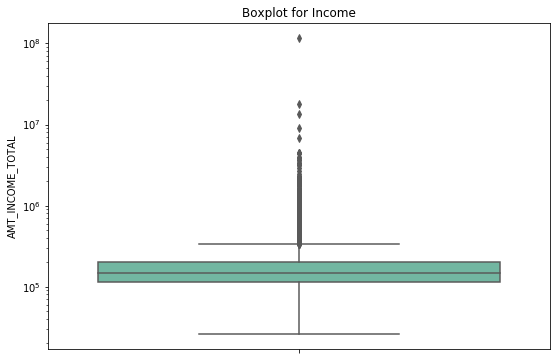

In [58]:
boxplot_univariate(train_data, col_name = 'AMT_INCOME_TOTAL', title = 'Boxplot for Income')

#### Inferences : 

#### - The lower fence of the Boxplot lies between 0 and 10^5, while the upper fence lies between 10^5 and 10^6.
#### - The outliers seem to be ranging even higher than 10^7.
#### - The first quartile seems very big compared to the third quartlie indicating many values lie with first quartile.

#### 5.1.2 Outlier Analysis for AMT_CREDIT

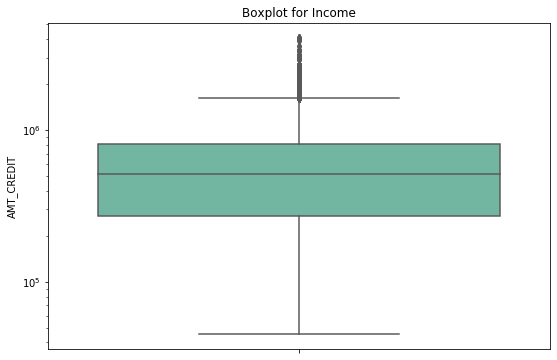

In [59]:
boxplot_univariate(train_data, col_name = 'AMT_CREDIT', title = 'Boxplot for Income')

#### Inferences :
#### - The lower fence of the Boxplot lies between 0 and 10^5, while the upper fence lies between 10^6 and 10^7.
#### - The outliers seem to range between 10^6 and 10^7. 
#### - The first quartile seems very big compared to the third quartlie indicating many values lie with first quartile.

#### 5.1.3 Outlier Analysis for AMT_ANNUITY

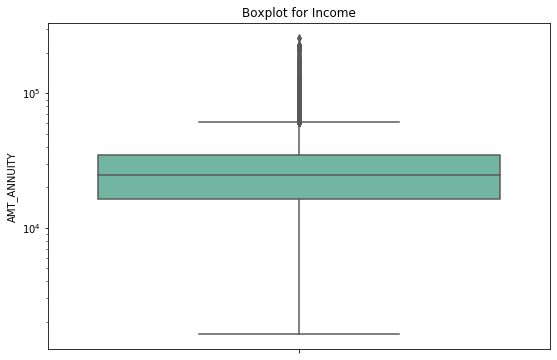

In [60]:
boxplot_univariate(train_data, col_name = 'AMT_ANNUITY', title = 'Boxplot for Income')

#### Inferences :
#### - The lower fence of the Boxplot lies between 0 and 10^4, while the upper fence lies below 10^5.
#### - The outliers seem to range between 10^5 and above.
#### - The first quartile seems very big compared to the third quartlie indicating many values lie with first quartile.

#### 5.1.4 Outlier Analysis for AMT_GOODS_PRICE

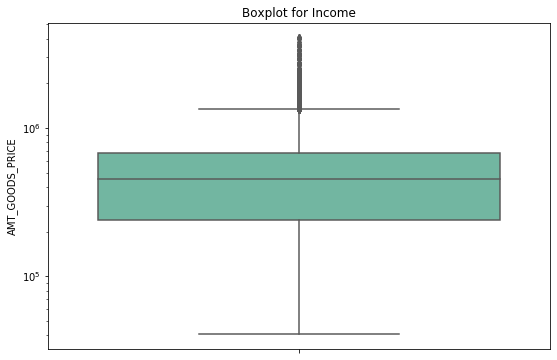

In [61]:
boxplot_univariate(train_data, col_name = 'AMT_GOODS_PRICE', title = 'Boxplot for Income')

#### Inferences :
#### - The lower fence of the Boxplot lies between 0 and 10^5, while the upper fence lies below 10^6 and 10^7.
#### - The outliers seem to range between 10^6 and above.
#### - The first quartile seems very big compared to the third quartlie indicating many values lie with first quartile.

#### 5.1.5 Outlier Analysis for REGION_POPULATION_RELATIVE

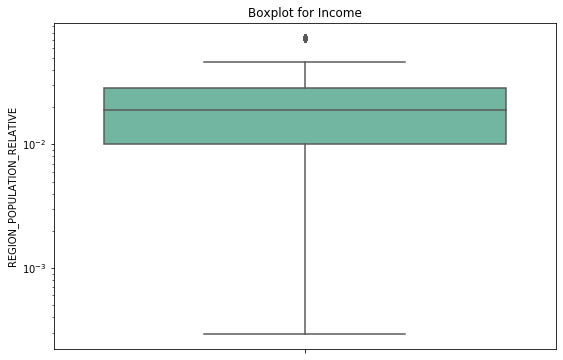

In [62]:
boxplot_univariate(train_data, col_name = 'REGION_POPULATION_RELATIVE', title = 'Boxplot for Income')

#### Inferences:

#### - The mass of the boxplot located exactly above 10^-2.
#### - There are not much outliers in this case except for one above the upper fence.
#### - First quartile is way bigger than first quartile. 

### 5.2 Summary of inferences together :

#### 1. It has been a common observation that all the first quartile is always larger third quartile which inturn tells us the spread of the data. 
#### 2. While the Region population has the lowest outliers and on the other hand Income has highest outliers.
#### 3. The log scale boxplot appears to have been suitable for all the three paramerts based on the nature of the values.

### 5.3 Outlier Analysis by Binning

#### 5.3.1 Creating bins for Income Amount

In [63]:
income_bins = [0,50000,100000,150000,200000,250000,300000,350000,400000,450000,500000,10000000000000]
income_class = ['0-50000','50000-100000','100000-150000', '150000-200000',
       '200000-250000','250000-300000','300000-350000','350000-400000','400000-450000','450000-500000','Above 500000']
train_data['AMT_INCOME_CLASS'] = pd.cut(train_data['AMT_INCOME_TOTAL'], income_bins, labels = income_class)

In [64]:
train_data['AMT_INCOME_CLASS'].value_counts()

100000-150000    91591
150000-200000    64307
50000-100000     59181
200000-250000    48137
250000-300000    17039
300000-350000     8874
350000-400000     5802
400000-450000     4924
0-50000           4517
Above 500000      2702
450000-500000      437
Name: AMT_INCOME_CLASS, dtype: int64

#### 5.3.2 Creating bins for Credit Amount

In [65]:
credit_bins = [0,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000,10000000000000]
credit_class = ['0-100000', '100000-200000','200000-300000', '300000-400000', '400000-500000','500000-600000','600000-700000','700000-800000','800000-900000','900000-1000000', 'Above 1000000']

train_data['AMT_CREDIT_CLASS']=pd.cut(train_data['AMT_CREDIT'],credit_bins,labels = credit_class)

In [66]:
train_data['AMT_CREDIT_CLASS'].value_counts()

200000-300000     54813
Above 1000000     49985
500000-600000     34232
400000-500000     32038
100000-200000     30140
300000-400000     26338
600000-700000     24049
800000-900000     21792
700000-800000     19193
900000-1000000     8927
0-100000           6004
Name: AMT_CREDIT_CLASS, dtype: int64

## 6. Analysis on Target variable

### 6.1 Investigating the Imbalance of data

In [70]:
train_data.TARGET.value_counts(normalize = True)

0.0    0.919271
1.0    0.080729
Name: TARGET, dtype: float64

##### 0 - Non-Defaulter, 1 - Defaulter. 
##### It can be understood from above that about 92% pay their loans in time whilst 8% default.
##### We need to analyse data further to gain more insights

### 6.2 Disect the dataframe into based on TARGET values 0 & 1

In [71]:
target_0 = train_data.loc[train_data.TARGET == 0]
target_1 = train_data.loc[train_data.TARGET == 1]

### 6.3 Univariate Analysis 

#### 6.3.1 Income class

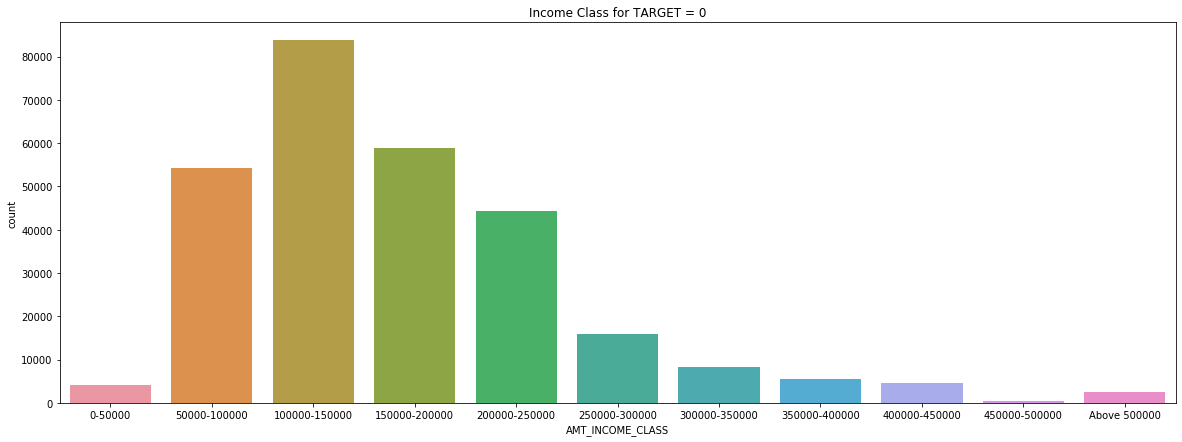

In [84]:
plt.figure(figsize=[20,7])
plt.title('Income Class for TARGET = 0', fontsize = 12)
sns.countplot(target_0['AMT_INCOME_CLASS'])
plt.show()

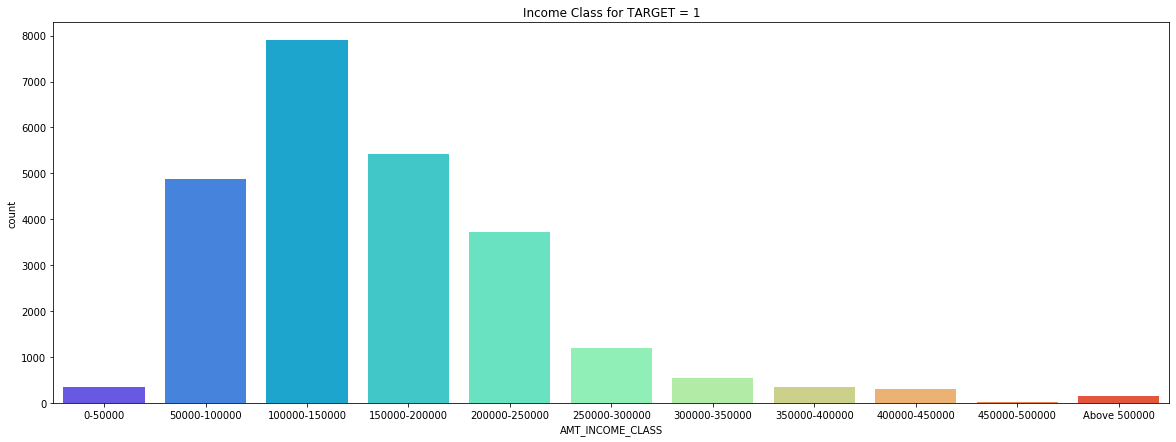

In [93]:
plt.figure(figsize=[20,7])
plt.title('Income Class for TARGET = 1',fontsize=12)
sns.countplot(target_1['AMT_INCOME_CLASS'], palette = 'rainbow')
plt.show()

#### Inferences : 

#### 1. The countplot shows Income Class 1 lakh to 1.5 lakh income level has the most number of customers in both Data frames target_1 and target_0.
#### 2. The overall layout of both the data frames appear similar even with different frequencies indicating that most people default payment and also pay timely in the rage of 50000 to 250000. The interval also seems to have most number of customers.


#### 6.3.2 Credit Class

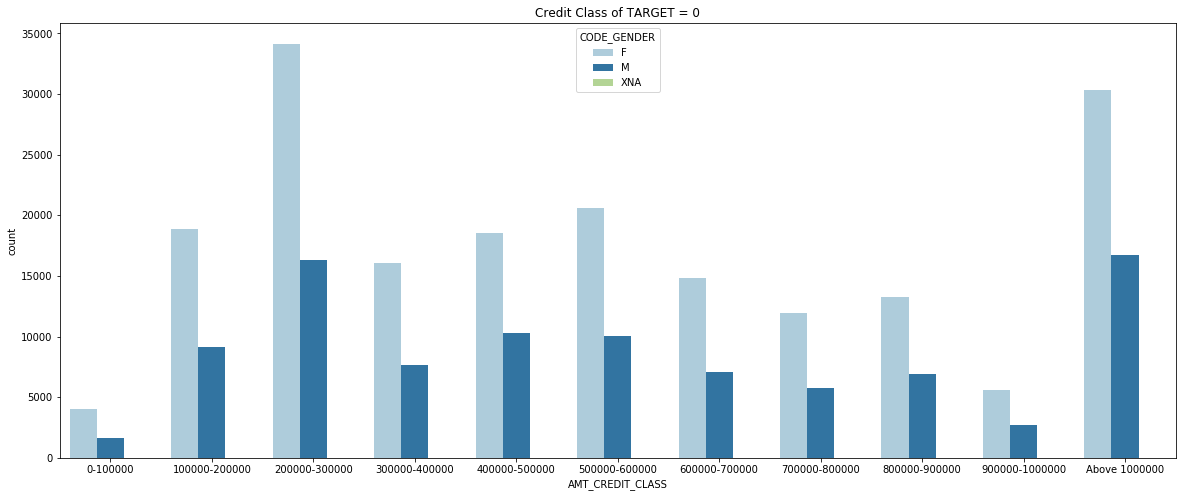

In [97]:
plt.figure(figsize = [20,8])
plt.title('Credit Class of TARGET = 0')
sns.countplot(target_0['AMT_CREDIT_CLASS'], hue = target_0['CODE_GENDER'], palette ='Paired')
plt.show()

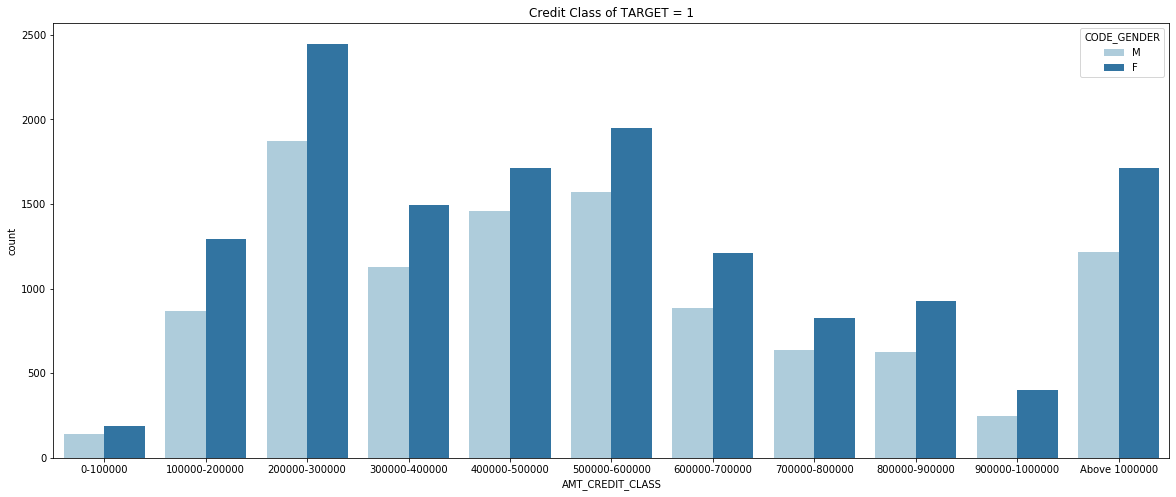

In [212]:
plt.figure(figsize = [20,8])
plt.title('Credit Class of TARGET = 1')
sns.countplot(target_1['AMT_CREDIT_CLASS'], hue = target_1['CODE_GENDER'], palette ='Paired')
plt.show()

#### Inferences :
#### - It can be seen there are Defauts between intervals of 2 to 5 lakhs, 5 to 6 lakhs and above 10 lakhs

#### 6.3.3 Gender behaviour

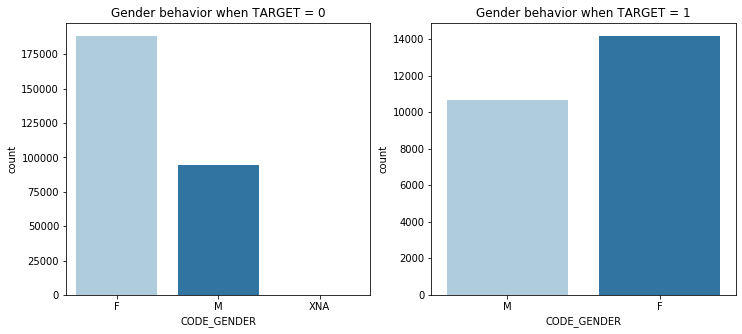

In [101]:
plt.figure(figsize =[12,5])
plt.subplot(1,2,1)
plt.title('Gender behavior when TARGET = 0')
sns.countplot(target_0['CODE_GENDER'], palette ='Paired')
plt.subplot(1,2,2)
plt.title('Gender behavior when TARGET = 1')
sns.countplot(target_1['CODE_GENDER'],palette = 'Paired')
plt.show()

#### Inferences : 
#### 1. The population of Females is higher than males in the original Dataset, Females are almost twice as Males.
#### 2. By looking at both the plots, overall it can be understood that Females pay the loans in time.

#### 6.3.4 Name Contract Type- Hypothesis 3

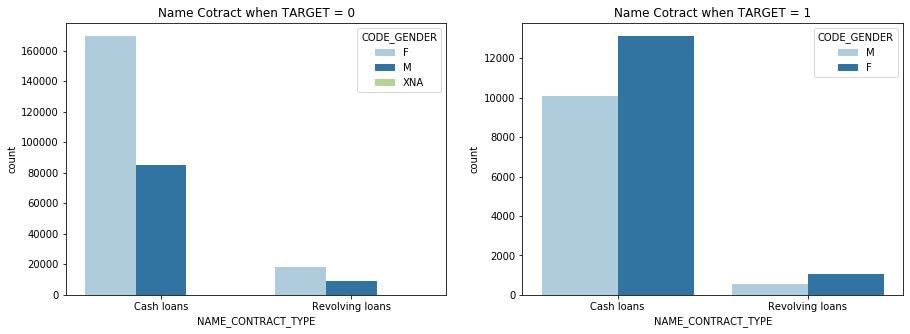

In [102]:
plt.figure(figsize = [15,5])
plt.subplot(1,2,1)
plt.title('Name Cotract when TARGET = 0')
sns.countplot(target_0['NAME_CONTRACT_TYPE'], hue = target_0['CODE_GENDER'], palette ='Paired')
plt.subplot(1,2,2)
plt.title('Name Cotract when TARGET = 1')
sns.countplot(target_1['NAME_CONTRACT_TYPE'], hue = target_1['CODE_GENDER'], palette = 'Paired')
plt.show()

#### Inferences:
#### 1. Most loans appear to be of Cash Loans.
#### 2. Females are taking the most Loans.

#### 6.3.5 Name Income Type

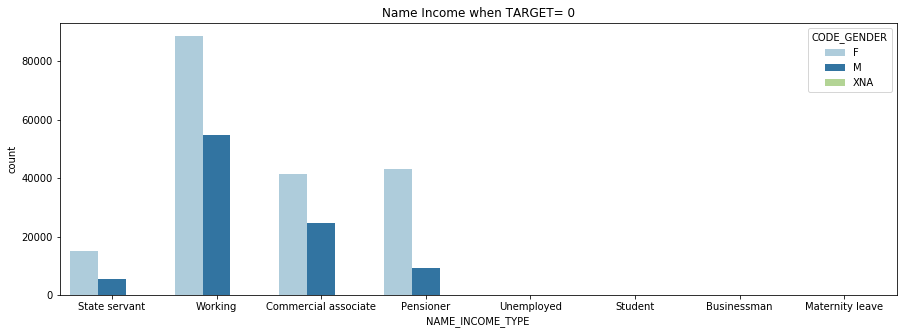

In [105]:
plt.figure(figsize = [15,5])
plt.title('Name Income when TARGET= 0')
sns.countplot(target_0['NAME_INCOME_TYPE'], hue = target_0['CODE_GENDER'], palette = 'Paired')
plt.show()

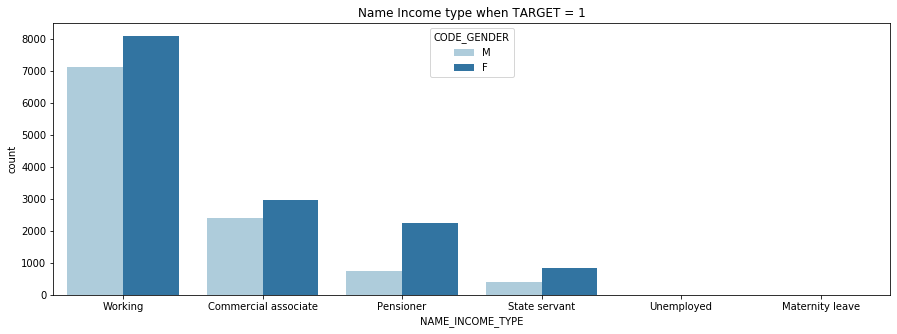

In [106]:
plt.figure(figsize=[15,5])
plt.title('Name Income type when TARGET = 1')
sns.countplot(target_1['NAME_INCOME_TYPE'], hue = target_1['CODE_GENDER'], palette = 'Paired')
plt.show()

#### Inferences : 
#### 1. Working Professional seems to have taken Loans the most.
#### 2. Female who belong to pensioners category have Defaulted the most compared to males in across other categories.
#### 3. People who belong to categories Unemployed, Students, Businessmen, Maternity Leave have taken the least loans.

### 6.4 Correlation for the Continous Variables

In [108]:
target_0.iloc[0:,2:].head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_CLASS,AMT_CREDIT_CLASS
1,Cash loans,F,N,N,0.0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1.0,1.0,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,250000-300000,Above 1000000
2,Revolving loans,M,Y,Y,0.0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2.0,2.0,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,50000-100000,100000-200000
3,Cash loans,F,N,Y,0.0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2.0,2.0,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,100000-150000,300000-400000
4,Cash loans,M,N,Y,0.0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2.0,2.0,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,100000-150000,500000-600000
5,Cash loans,M,N,Y,0.0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,16941,-1588,-4970.0,-477,1,1,1,1,1,0,Laborers,2.0,2.0,2.0,WEDNESDAY,16,0,0,0,0,0,0,Other,0.354225,0.621226,0.0,0.0,0.0,0.0,-2536.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,50000-100000,400000-500000


In [109]:
numeric_cols= []
target_0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_CLASS,AMT_CREDIT_CLASS
1,100003,0.0,Cash loans,F,N,N,0.0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1.0,1.0,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,250000-300000,Above 1000000
2,100004,0.0,Revolving loans,M,Y,Y,0.0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2.0,2.0,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,50000-100000,100000-200000
3,100006,0.0,Cash loans,F,N,Y,0.0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2.0,2.0,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,100000-150000,300000-400000
4,100007,0.0,Cash loans,M,N,Y,0.0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2.0,2.0,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,100000-150000,500000-600000
5,100008,0.0,Cash loans,M,N,Y,0.0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,16941,-1588,-4970.0,-477,1,1,1,1,1,0,Laborers,2.0,2.0,2.0,WEDNESDAY,16,0,0,0,0,0,0,Other,0.354225,0.621226,0.0,0.0,0.0,0.0,-2536.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,50000-100000,400000-500000


In [110]:
numeric_columns = ['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE',
                   'DAYS_BIRTH','CNT_FAM_MEMBERS','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY']
target_0_CORR = target_0[numeric_columns].corr()

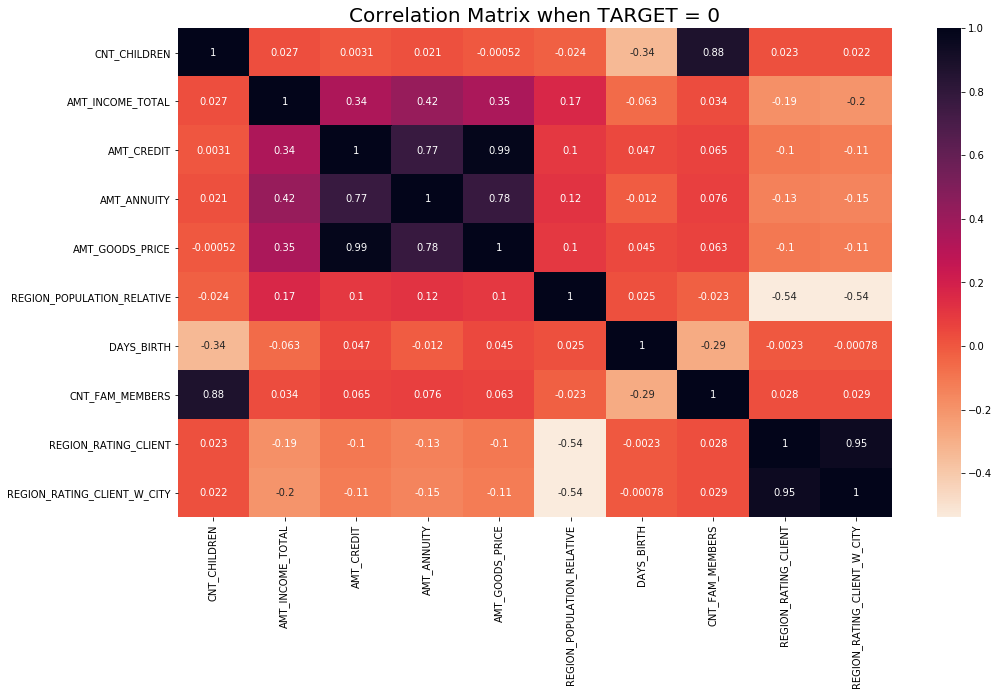

In [113]:
plt.figure(figsize = [16,9])
plt.title('Correlation Matrix when TARGET = 0', fontsize = 20)
sns.heatmap(target_0_CORR, cmap='rocket_r', annot=True)
plt.show()

#### Inferences : 
#### 1. Income amount correlates postively with credit taken
#### 2. Childen's count inversely correlates with age. 
#### 3. Overall we can't see a strong correlation between any other parameters.

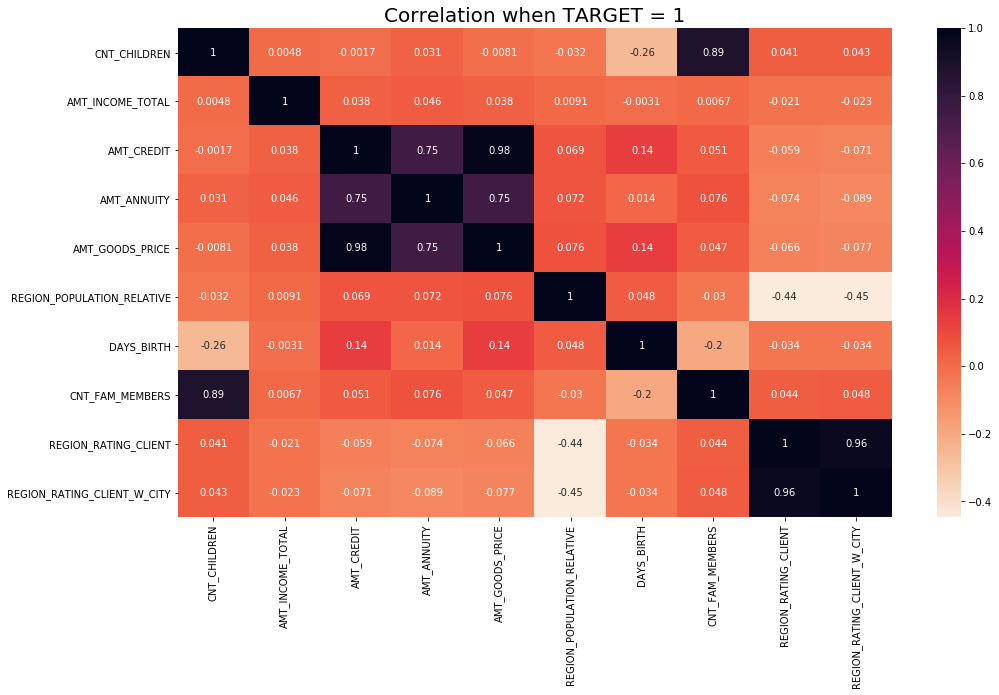

In [117]:
target_1_CORR = target_1[numeric_columns].corr()
plt.figure(figsize=[16,9])
plt.title('Correlation when TARGET = 1',fontsize = 20)
sns.heatmap(target_1_CORR, cmap = 'rocket_r', annot = True)
plt.show()

#### Inferences :
#### - The correlation matrices of TARGET = 0 and TARGET = 1 with considered numeric paramerts appear similar

### 6.5 Bivariate Analysis

In [123]:
def boxplot_bivariate(col1,col2,title1,title2):
    plt.figure(figsize = [15,8])
    plt.subplot(1,2,1)
    plt.yscale('log')
    plt.title(title1)
    plt.xticks(rotation=45)
    sns.boxplot(data = target_0, x= col1, y = col2, orient = 'v',palette = 'Set1')
    plt.subplot(1,2,2)
    plt.yscale('log')
    plt.title(title2)
    plt.xticks(rotation=45)
    sns.boxplot(data = target_1, x = col1, y = col2, orient = 'v', palette = 'Set2')
    plt.show()

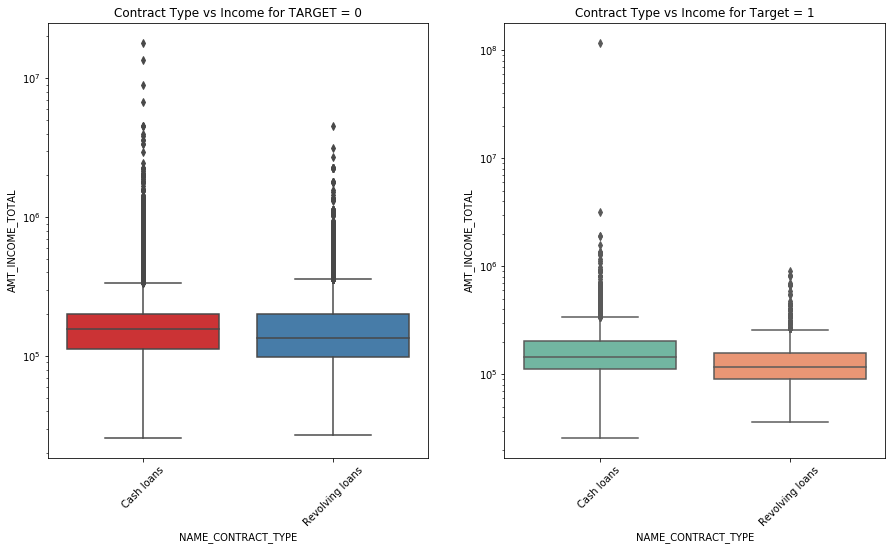

In [124]:
#Income versus Contract
boxplot_bivariate('NAME_CONTRACT_TYPE','AMT_INCOME_TOTAL', 
                  'Contract Type vs Income when TARGET = 0','Contract Type vs Income when Target = 1')

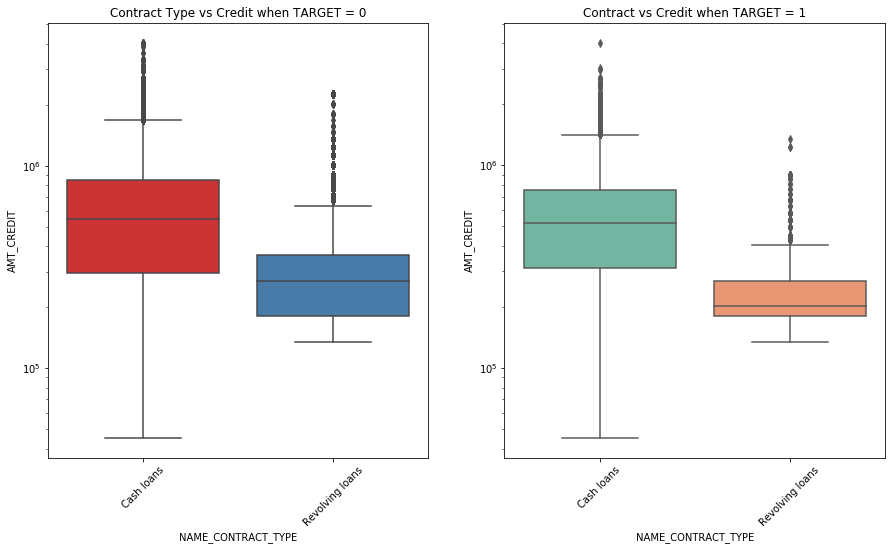

In [126]:
# Contract Type vs Credit
boxplot_bivariate('NAME_CONTRACT_TYPE','AMT_CREDIT', 
                  'Contract Type vs Credit when TARGET = 0', 'Contract vs Credit when TARGET = 1')

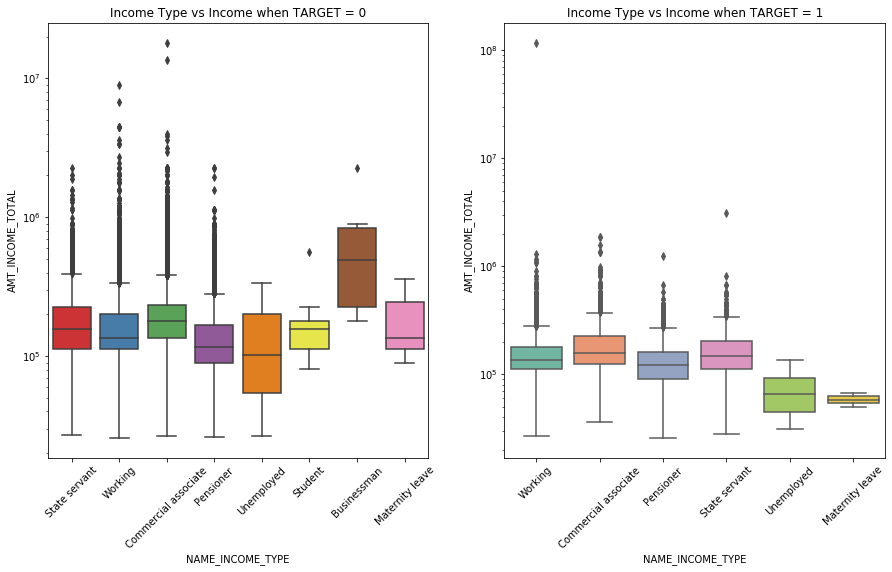

In [127]:
#Income Type vs Income
boxplot_bivariate('NAME_INCOME_TYPE', 'AMT_INCOME_TOTAL',
                  'Income Type vs Income when TARGET = 0','Income Type vs Income when TARGET = 1')

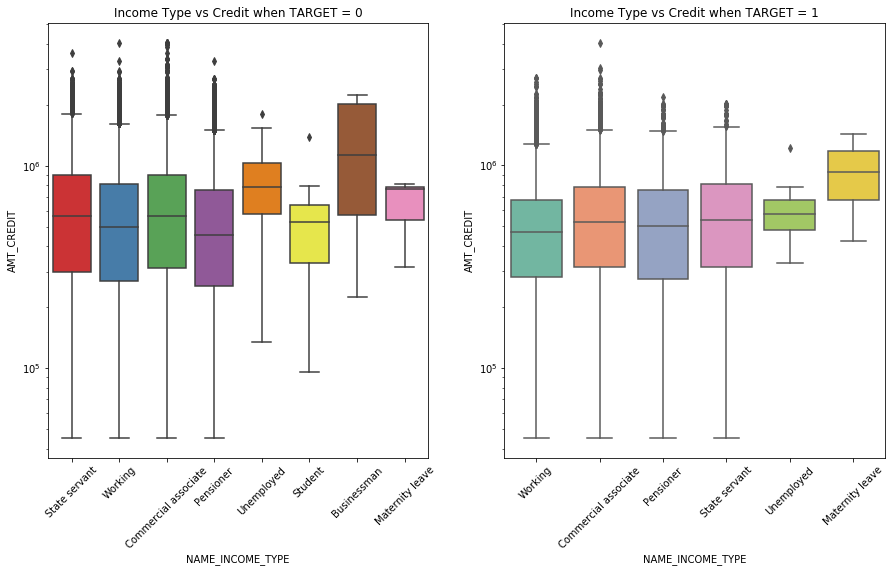

In [128]:
#Income Type vs Credit
boxplot_bivariate('NAME_INCOME_TYPE','AMT_CREDIT', 
                 'Income Type vs Credit when TARGET = 0','Income Type vs Credit when TARGET = 1')

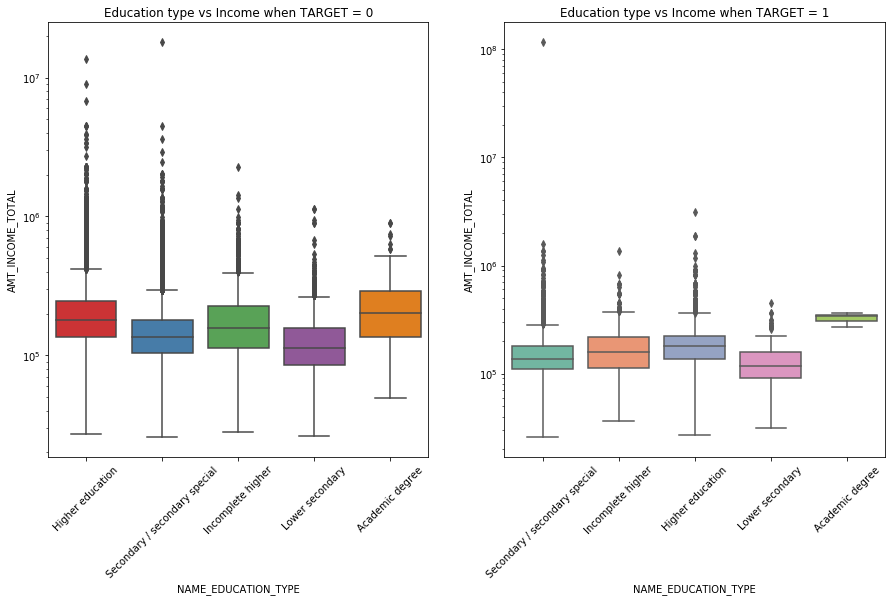

In [129]:
#Education Type vs Income
boxplot_bivariate('NAME_EDUCATION_TYPE','AMT_INCOME_TOTAL',
                  'Education type vs Income when TARGET = 0', 'Education type vs Income when TARGET = 1')

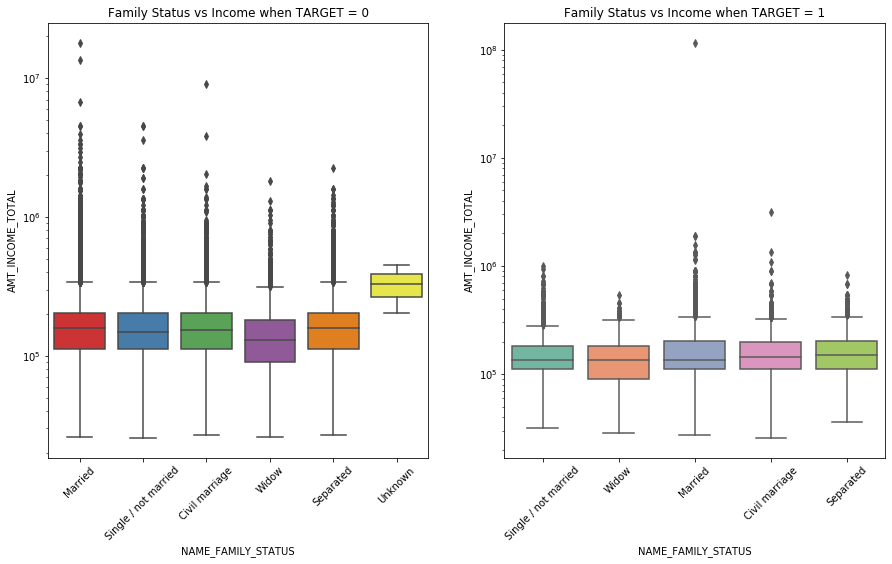

In [130]:
#Famility Status vs Income
boxplot_bivariate('NAME_FAMILY_STATUS','AMT_INCOME_TOTAL',
                 'Family Status vs Income when TARGET = 0', 'Family Status vs Income when TARGET = 1')

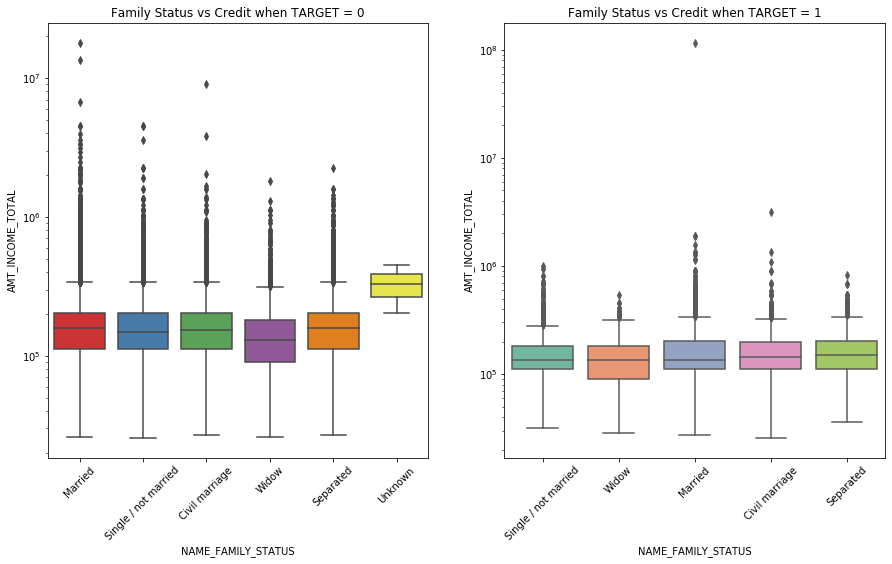

In [131]:
#Family status vs Income
boxplot_bivariate('NAME_FAMILY_STATUS','AMT_INCOME_TOTAL',
                 'Family Status vs Credit when TARGET = 0', 'Family Status vs Credit when TARGET = 1')

#### 6.5.2 Analysis on Target variable from Original Dataset

In [143]:
train_data.TARGET.value_counts(normalize = True)

0.0    0.919271
1.0    0.080729
Name: TARGET, dtype: float64

#### 8% of users default in Application Dataset

In [144]:
train_data.groupby('NAME_CONTRACT_TYPE')['TARGET'].mean()*100

NAME_CONTRACT_TYPE
Cash loans         8.345913
Revolving loans    5.478329
Name: TARGET, dtype: float64

In [145]:
train_data.groupby('CODE_GENDER')['TARGET'].mean()*100

CODE_GENDER
F       6.999328
M      10.141920
XNA     0.000000
Name: TARGET, dtype: float64

In [146]:
train_data.groupby('NAME_TYPE_SUITE')['TARGET'].mean()*100

NAME_TYPE_SUITE
Children           7.376798
Family             7.494583
Group of people    8.487085
Other_A            8.775982
Other_B            9.830508
Spouse, partner    7.871592
Unaccompanied      8.183047
Name: TARGET, dtype: float64

In [147]:
train_data.groupby('NAME_INCOME_TYPE')['TARGET'].mean()*100

NAME_INCOME_TYPE
Businessman              0.000000
Commercial associate     7.484257
Maternity leave         40.000000
Pensioner                5.386366
State servant            5.754965
Student                  0.000000
Unemployed              36.363636
Working                  9.588472
Name: TARGET, dtype: float64

In [148]:
train_data.groupby('NAME_EDUCATION_TYPE')['TARGET'].mean()*100

NAME_EDUCATION_TYPE
Academic degree                   1.829268
Higher education                  5.355115
Incomplete higher                 8.484966
Lower secondary                  10.927673
Secondary / secondary special     8.939929
Name: TARGET, dtype: float64

In [149]:
train_data.groupby('NAME_FAMILY_STATUS')['TARGET'].mean()*100

NAME_FAMILY_STATUS
Civil marriage          9.944584
Married                 7.559868
Separated               8.194234
Single / not married    9.807675
Unknown                 0.000000
Widow                   5.824217
Name: TARGET, dtype: float64

## 7. Analysis on Previous Application

In [175]:
train_prev = pd.read_csv('previous_application.csv')
train_prev.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [176]:
train_prev.shape

(1670214, 37)

In [179]:
test_data = pd.merge(left = train_data,right=train_prev,how='inner',on='SK_ID_CURR',suffixes = '_x')

In [180]:
#renaming columns from train_data(Application) and train_prev(Previous Application)
test_data_1 = test_data.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT',
                                 'AMT_ANNUITY_':'AMT_ANNUITY','AMT_GOODS_PRICE_':'AMT_GOODS_PRICE',
                                 'NAME_TYPE_SUITE_':'NAME_TYPE_SUITE',
                                 'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
                                 'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START',
                                 'NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV',
                                 'AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV',
                                 'AMT_GOODS_PRICEx':'AMT_GOODS_PRICE_PREV',
                                 'WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV',
                                 'NAME_TYPE_SUITEx':'NAME_TYPE_SUITE_PREV',
                                 'HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)


In [181]:
test_data_1.shape

(1413701, 111)

In [182]:
test_data_1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_CLASS,AMT_CREDIT_CLASS,SK_ID_PREV,NAME_CONTRACT_TYPE_PREV,AMT_ANNUITY_PREV,AMT_APPLICATION,AMT_CREDIT_PREV,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_PREV,WEEKDAY_APPR_PROCESS_START_PREV,HOUR_APPR_PROCESS_START_PREV,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_PREV,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1.0,Cash loans,M,N,Y,0.0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2.0,2.0,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,200000-250000,400000-500000,1038818,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,SATURDAY,9,Y,1,0.000000,NaN,NaN,XAP,Approved,-606,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0.0,Cash loans,F,N,N,0.0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1.0,1.0,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,250000-300000,Above 1000000,1810518,Cash loans,98356.995,900000.0,1035882.0,NaN,900000.0,FRIDAY,12,Y,1,NaN,NaN,NaN,XNA,Approved,-746,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0.0,Cash loans,F,N,N,0.0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1.0,1.0,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,250000-300000,Above 1000000,2636178,Consumer loans,64567.665,337500.0,348637.5,0.0,337500.0,SUNDAY,17,Y,1,0.000000,NaN,NaN,XAP,Approved,-828,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,1000

In [183]:
test_data_1.dtypes

SK_ID_CURR                            int64
TARGET                              float64
NAME_CONTRACT_TYPE                   object
CODE_GENDER                          object
FLAG_OWN_CAR                         object
FLAG_OWN_REALTY                      object
CNT_CHILDREN                        float64
AMT_INCOME_TOTAL                    float64
AMT_CREDIT                          float64
AMT_ANNUITY                         float64
AMT_GOODS_PRICE                     float64
NAME_TYPE_SUITE                      object
NAME_INCOME_TYPE                     object
NAME_EDUCATION_TYPE                  object
NAME_FAMILY_STATUS                   object
NAME_HOUSING_TYPE                    object
REGION_POPULATION_RELATIVE          float64
DAYS_BIRTH                            int64
DAYS_EMPLOYED                         int64
DAYS_REGISTRATION                   float64
DAYS_ID_PUBLISH                       int64
FLAG_MOBIL                            int64
FLAG_EMP_PHONE                  

### 7.2 Impact Analysis of Gender on Defaulters

In [185]:
test_data_1.groupby('CODE_GENDER')['TARGET'].mean()*100

CODE_GENDER
F       7.625696
M      10.801144
XNA     0.000000
Name: TARGET, dtype: float64

#### Now that we have combined two datasets, we can still see Males default more compared to Females. 

### 7.3 Impact Analysis of Income Type on Defaults

In [186]:
test_data_1.groupby('NAME_INCOME_TYPE')['TARGET'].mean()*100

NAME_INCOME_TYPE
Commercial associate      8.114010
Maternity leave         100.000000
Pensioner                 5.833796
State servant             6.411506
Student                   0.000000
Unemployed               54.471545
Working                  10.244597
Name: TARGET, dtype: float64

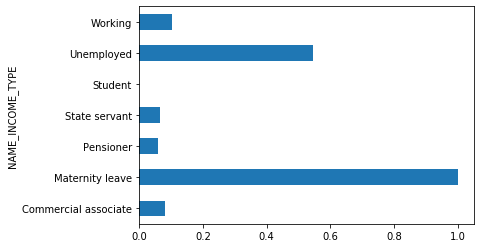

In [220]:
test_data_1.groupby('NAME_INCOME_TYPE')['TARGET'].mean().plot.barh()
plt.show()

#### Inferences:
#### 1. People who belong to categories Maternity Leave,Unemployed pose highest risk of defaulting, People who belong to those groups should not be targetted for advertising loans.
#### 2. People who belong to categories Student, Pensioner and Servent seem very unlikely to default and they seem to be best segmets to target.
#### 3. On the otherhand, We need to closely check customers belonging to Working category before taing a decision to grant a loan.

### 7.4 Impact Analysis on Education Type on Default

In [187]:
test_data_1.groupby('NAME_EDUCATION_TYPE')['TARGET'].mean()*100

NAME_EDUCATION_TYPE
Academic degree                   1.727116
Higher education                  6.048682
Incomplete higher                 8.984539
Lower secondary                  10.877418
Secondary / secondary special     9.393758
Name: TARGET, dtype: float64

#### Inferences : 
#### 1. Customers who belong to 'Academic Degree' and 'Higher Education' seem to be the best category to target .
#### 2. Customers who belong to 'Lower secondary' and 'Secondary / secondary special' need to be checked carefully before granting loan. 

### 7.5 Impact Analysis of Housing Type on Defaults

In [189]:
test_data_1.groupby('NAME_HOUSING_TYPE')['TARGET'].mean()*100

NAME_HOUSING_TYPE
Co-op apartment         8.452951
House / apartment       8.376602
Municipal apartment     9.465779
Office apartment        7.219111
Rented apartment       12.554966
With parents           12.727627
Name: TARGET, dtype: float64

#### Inferences :
#### - Customers who live with parents and in Rented aparments need to be checked carefully before deciding to grant loans.

### 7.6 Impact Analysis of Occupation Type on Defaults- hypothesis 1 and hypothesis 2

In [190]:
test_data_1.groupby('OCCUPATION_TYPE')['TARGET'].mean()*100

OCCUPATION_TYPE
Accountants               5.739072
Cleaning staff            9.248602
Cooking staff            10.934345
Core staff                6.847775
Drivers                  12.043965
HR staff                  7.349762
High skill tech staff     6.979766
IT staff                  6.870229
Laborers                 11.204979
Low-skill Laborers       19.098712
Managers                  7.130744
Medicine staff            7.547689
Private service staff     6.389933
Realty agents            10.073363
Sales staff               9.968419
Secretaries               8.016731
Security staff           11.699577
Waiters/barmen staff     10.909980
Name: TARGET, dtype: float64

#### Inferences :
#### 1. People who belong to Accountants,High skill tech staff,IT staff,HR staff,Private service staff categories seem to be the best targets.  
#### 2. Drivers,Low-skilled,Security Staff,Cooking Staff,Laborers & Waiters appear to have defaulted more compared to other categories, it is good to avoid.

### 7.7 Analyzing application status from 'Previous Application'

In [192]:
test_data_1['NAME_CONTRACT_STATUS'].value_counts(normalize=True)*100

Approved        62.679378
Canceled        18.351900
Refused         17.357984
Unused offer     1.610737
Name: NAME_CONTRACT_STATUS, dtype: float64

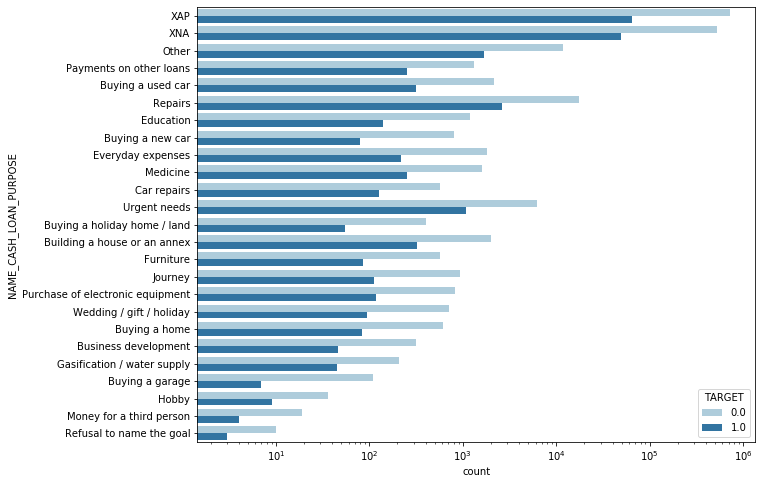

In [195]:
plt.figure(figsize=[10,8])
plt.xscale('log')
sns.countplot(data=test_data_1,y='NAME_CASH_LOAN_PURPOSE',hue='TARGET',palette='Paired')
plt.show()

#### Inferences :
#### Loans given to people for Car Repairs and Urgent needs seem to have been defaulted more often.